## Dirichlet distribution

In [51]:
import matplotlib.pyplot as plt 
import math
import numpy as np
import seaborn as sns
from scipy.stats import beta
from scipy.stats import dirichlet
from scipy.stats import norm
from scipy.stats import uniform

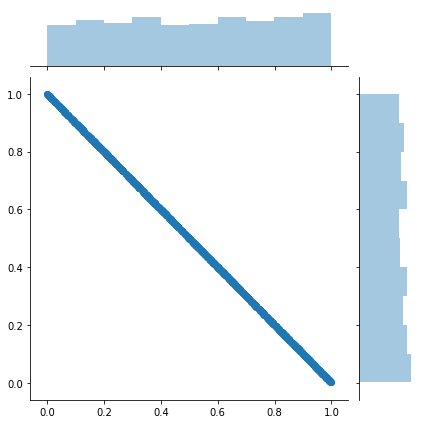

In [147]:
n_iterations = 1000
alpha = np.array([1,1])

samples = []

for i in range(n_iterations):
    sample = dirichlet.rvs(alpha)
    samples.append(sample[0])

samples = np.array(samples)
sns.jointplot(samples[:, 0], samples[:, 1])

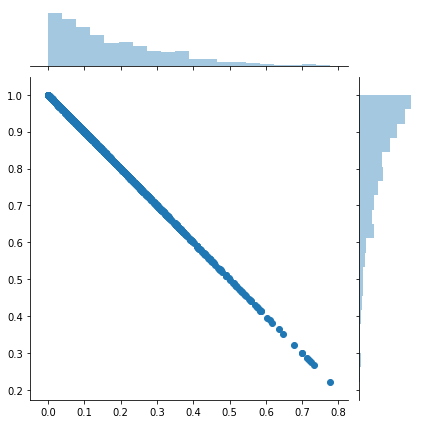

In [148]:
n_iterations = 1000
alpha = np.array([1,5])

samples = []

for i in range(n_iterations):
    sample = dirichlet.rvs(alpha)
    samples.append(sample[0])

samples = np.array(samples)
sns.jointplot(samples[:, 0], samples[:, 1])

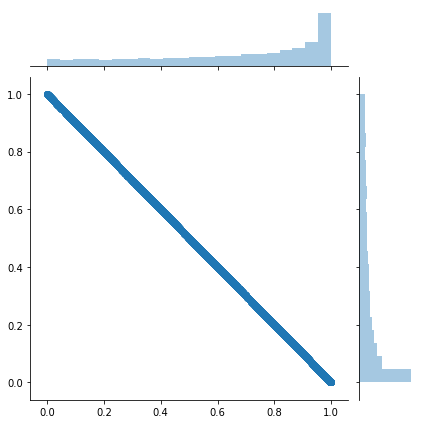

In [156]:
n_iterations = 10000
alpha = np.array([1,0.5])

samples = []

for i in range(n_iterations):
    sample = dirichlet.rvs(alpha)
    samples.append(sample[0])

samples = np.array(samples)
sns.jointplot(samples[:, 0], samples[:, 1])

## Beta distribution

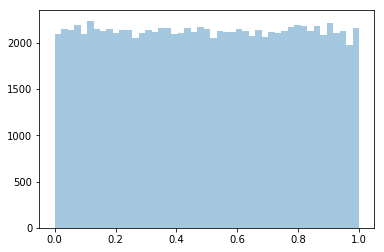

In [188]:
n_iterations = 100000

samples = []

for i in range(n_iterations):
    sample = beta.rvs(1,1)
    samples.append(sample)

samples = np.array(samples)
sns.distplot(samples, kde=False)

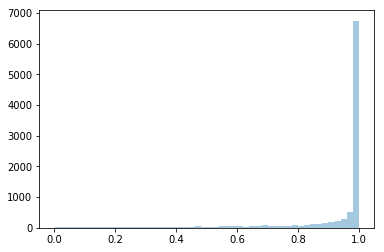

In [199]:
n_iterations = 10000

samples = []

for i in range(n_iterations):
    sample = beta.rvs(1,0.1)
    samples.append(sample)

samples = np.array(samples)
sns.distplot(samples, kde=False)

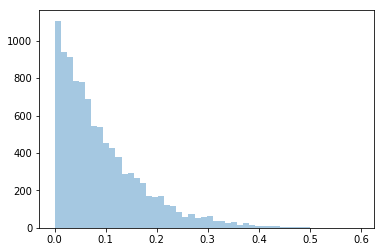

In [202]:
n_iterations = 10000

samples = []

for i in range(n_iterations):
    sample = beta.rvs(1,10)
    samples.append(sample)

samples = np.array(samples)
sns.distplot(samples, kde=False)

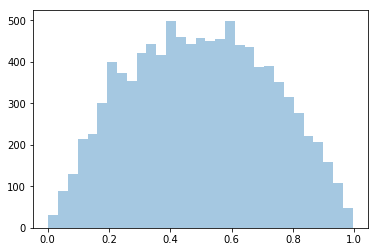

In [193]:
n_iterations = 10000

samples = []

for i in range(n_iterations):
    sample = beta.rvs(2,2)
    samples.append(sample)

samples = np.array(samples)
sns.distplot(samples, kde=False)

## Dirichlet process with stick-breaking

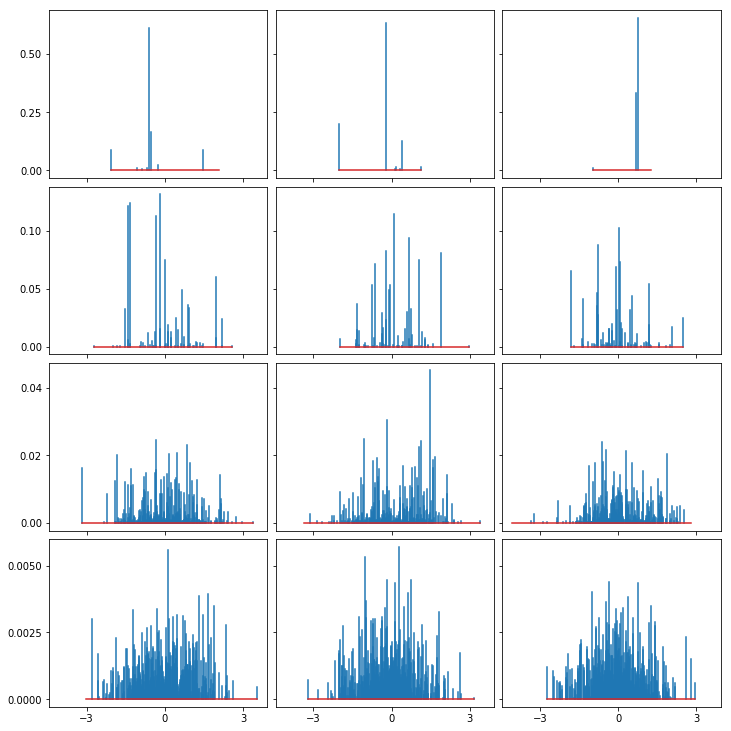

In [205]:
# https://commons.wikimedia.org/wiki/File:Dirichlet_process_draws.svg

def draw_stick_breaking(ax, alpha, base_distribution):
    beta_prime_ks = []
    theta_ks = []
    
    beta_distribution = beta(1, alpha)
    
    rest = 1
    for k in range(500):
        theta_k = base_distribution.rvs()
        beta_k = beta_distribution.rvs()
        
        theta_ks.append(theta_k)
        beta_prime_k = beta_k*rest
        beta_prime_ks.append(beta_prime_k)
        
        rest *= 1-beta_k
        if rest < 1e-4:
            break
                
    ax.stem(theta_ks, beta_prime_ks, markerfmt=' ')
    
alphas = [1, 10, 100, 1000]
base_distribution = norm(0, 1)

n_rows = len(alphas)
n_cols = 3

fig, axarr = plt.subplots(n_rows,n_cols, sharex=True, sharey="row", figsize=(10,10))

for i_row in range(n_rows):
    for i_col in range(n_cols):
        draw_stick_breaking(axarr[i_row][i_col], alphas[i_row], base_distribution)

# set 3 ticks on each axis   
axarr[0][0].xaxis.set_major_locator(plt.MaxNLocator(3))
for i_row in range(n_rows):
    axarr[i_row][0].yaxis.set_major_locator(plt.MaxNLocator(3))
fig.tight_layout(pad=0.15)

plt.show()


## Non-Pólya urn experiment

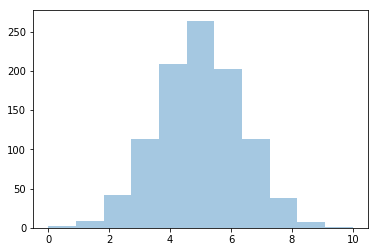

In [169]:
n_iterations = 1000
n_steps = 10
n_bins = min(n_steps + 1, 101)

samples = []

whites_in_urn = 1.
blacks_in_urn = 1.
p_white = whites_in_urn / (whites_in_urn + blacks_in_urn)

for i in range(n_iterations):
    n_whites_drawn = 0;

    for j in range(n_steps):
        if uniform.rvs() <= p_white:
            n_whites_drawn += 1.
        
    samples.append(n_whites_drawn)

sns.distplot(samples, kde=False, bins=n_bins)

## Pólya urn experiment

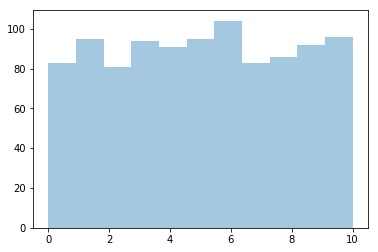

In [168]:
n_iterations = 1000
n_steps = 10
n_bins = min(n_steps + 1, 101)

samples = []

for i in range(n_iterations):
    n_whites_drawn = 0;
    whites_in_urn = 1.
    blacks_in_urn = 1.

    for j in range(n_steps):
        p_white = whites_in_urn / (whites_in_urn + blacks_in_urn)
        
        if uniform.rvs() <= p_white:
            n_whites_drawn += 1.
            whites_in_urn += 1.
        else:
            blacks_in_urn += 1.
        
    samples.append(n_whites_drawn)

sns.distplot(samples, kde=False, bins=n_bins)

## Chinese restaurant experiment

### apha=10

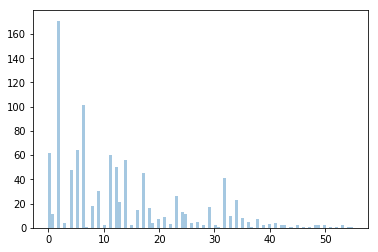

In [188]:
total_people=1000
tables = [1]
samples = [0]
alpha = 10.
people = 1

for i in range(total_people):
    r = uniform.rvs()
    c = 0.
    for j in range(len(tables)):
        c += (tables[j] / (people + alpha))
        if r <= c:
            tables[j] += 1
            samples.append(j)
            break
    if j == len(tables) - 1:
        tables.append(1)
        samples.append(len(tables))
    people += 1

n_bins = min(len(samples) + 1, 101)
sns.distplot(samples, kde=False, bins=n_bins)

## alpha = 5

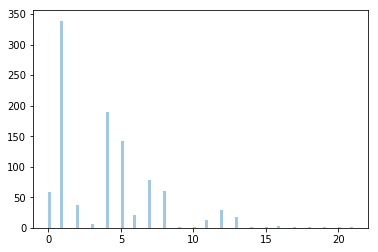

In [194]:
total_people=1000
tables = [1]
samples = [0]
alpha = 5.
people = 1

for i in range(total_people):
    r = uniform.rvs()
    c = 0.
    for j in range(len(tables)):
        c += (tables[j] / (people + alpha))
        if r <= c:
            tables[j] += 1
            samples.append(j)
            break
    if j == len(tables) - 1:
        tables.append(1)
        samples.append(len(tables))
    people += 1

n_bins = min(len(samples) + 1, 101)
sns.distplot(samples, kde=False, bins=n_bins)